<a href="https://colab.research.google.com/github/tlyonsWIT/Mathematical-Methods/blob/main/Mathematical%20Methods%20-%20Workbook%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematical Methods - Python Workbook 3

## B Sc (H) Applied Computing - Year 2  

# South East Technological University - Waterford

---
 

# Topic 1 - Vectors in 2-dimensions (2D)

## Items Covered:

1. Vectors & Lines

2. Parametric Lines

3. Interactive plots

4. Animations

## Calling the python libraries and functions


* In the cell below the necessary Python libraries and functions are imported, which will be needed for the current work book


In [1]:
import matplotlib.pyplot as plt  ## Library of functions for 2D plotting
import numpy as np ## Library of function for numerical work

from ipywidgets import widgets, interact, interactive, fixed, interact_manual # Import widgets for interactive plots
from IPython.display import clear_output # A function to clear interactive plots before each update

from matplotlib import animation # A function to create an animation
from IPython.display import HTML # For creating HTML animation whcih can be displayed directly in the browser / Colab notebook

---


## Item 1 - Vectors & Lines

### Item 1 (a) - The equation of a line

* The find the equation of a line, we need the slope of the line and a point along the line



* In these examples, the __slope__ will be given in the form of a vector
$$\vec{u}= u_{1}\hat{\imath} + u_{2}\hat{\jmath}$$
which points along the line



* The given point witll be of the form $B(a,b)$ where $a$ and $b$ are numbers. We usually call this point the __base-point__



* Recall from lectures, that the vector 
$\vec{u}= u_{1}\hat{\imath} + u_{2}\hat{\jmath}$
has a $\perp$ vector $\vec{u}^{\perp}$ of the form
$$
\vec{u}^{\perp} = u_{2}\hat{\imath} - u_{1}\hat{\jmath}
$$
or
$$
\vec{u}^{\perp} = -u_{2}\hat{\imath} + u_{1}\hat{\jmath}
$$



* If $P(x,y)$ is an __arbitrary point__ on the line, then the vector
$$
\vec{BP} = (x-a)\hat{\imath} + (y-b)\hat{\jmath}
$$
is a vector along the line, whcih means it is also $\perp$ to $\vec{u}^{\perp}$



* Since $\perp$ vectors have a dot-product of zero, then
$$
\vec{u}^{\perp}\cdot\vec{BP} = 0,
$$
which gives the equation of the line when worked out

* With $\vec{u}^{\perp} = u_{2}\hat{\imath} - u_{1}\hat{\jmath}$ and $\vec{BP} = (x-a)\hat{\imath} + (y-b)\hat{\jmath}$ we now have
$$
u_{2}(x-a) - u_{1}(y-b) = 0.
$$

* Solving for $y$ we now find
$$
u_{2}(x-a) = u_{1}(y-b) \implies \frac{u_{2}}{u_{1}}(x-a) = y-b \implies \frac{u_{2}}{u_{1}}(x-a) + b= y.
$$
so the equation of the line is aslo
$$
y = \frac{u_{2}}{u_{1}}(x-a) + b 
$$

* We can define a function __Y()__ for any vector $\vec{u}$ and base-point $B$

## Creating our functions

*  In the cell below we re-define the functions __v2d()__ to create vectors and __perp()__ to create a $\perp$ vector  (see __Workbook 2__)

In [2]:
def v2d(a,b):
    return np.array([a,b])

In [3]:
def perp(u):
    return np.array([u[1],-u[0]])

* We can now create a function called __Y()__


* There are three arguments for this function:
 1. The coordinate __x__
 2. The vector along the line __u__
 3. The base-point __B__

In [4]:
def Y(x,u,B):
    return u[1]/u[0]*(x-B[0]) + B[1]

* This function gives the $y$-coordinate for any value of $x$ along the line with slope $\vec{u}$ and passing through the point $B$

## __Eample__ 1 (from Lectures on Monday 26-Sep-2022)

* Show that the line along the vector
$$
\vec{u} = 2\hat{\imath} +\hat{\jmath}
$$
and passing through the point $B(-1,0)$ also contains the point $P(3,2)$

* Plot the line, the vector $u$ and the base-point $B$


### Solution

* We already know the equation of the line is 
$$
x-2y+1 = 0
$$

* First we define the vector $\vec{u}$ and the base-point $B$ using the function __v2d()__

In [5]:
B=v2d(-1,0)
u=v2d(2,1)

* To check $P(3,2)$ is along this line we use __x=3__ in the function __Y(x,u,B)__ and we should get 2 back 

In [6]:
Y(3,u,B)

2.0

* To plot the line we need to create the $x$-axis first

* We will use an $x$-axis from $-5$ to $5$ with 101 point

* This is created using the __np.linspace()__ function as shown below

In [7]:
X=np.linspace(-5,5,101)

* We also create the perpendicular vector $\vec{u}^{\perp}$ using the __perp()__ function

In [8]:
up=perp(u)

* Now we can plot the line with __X__ along the horizontal and __Y(x,u,B)__ along the vertical

* We have already seen how to plot a point and a vector in __Workbook 1__ and __Workbook 2__

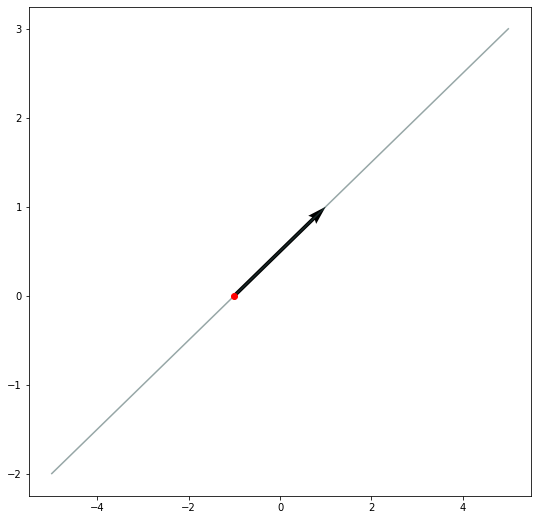

In [9]:
plt.figure(figsize=(9,9))
plt.plot(X,Y(X,u,B),color='darkslategray',alpha=0.5) # Plot the line
plt.plot(B[0],B[1],'o',color='r') # Plot the base-point
plt.quiver(B[0],B[1],u[0],u[1],color='k',scale=1,scale_units='xy',angles='xy') # Plot u

## _Exercise_ 1

* Show that the line along the vector
$$
\vec{v} = 5.6\hat{\imath} - 2.3\hat{\jmath}
$$
and passing through the point $B(2.8,-6.5)$ also contains the point $P(3,2)$

* Plot the line, the vector $\vec{v}$ and its perpendicular vector $\vec{v}^{\perp}$ and the base-point $B$

---

# Item 2 - Parametric Lines

* The point of parametric lines is they are much easier to work with since they give the coordinates directly from the vector and base-point


* The __parametric line__ in the direction of the vector
$$
\vec{u} = u_{1}\hat{\imath} + u_{2}\hat{\jmath} 
$$
passing through the base-point $B(a,b)$ is given by
$$
(x,y) = (a,b) + t(u_{1},u_{2}) = (a + tu_{1} , b+ tu_{2})
$$

* Thats it!! We can easily create a function to plot this parametric line, given any vector __u__ and base-point __B__

In [12]:
def PL(t,u,B): # u is the vector; dp is the number of decimal places
    return np.array([B[0] + t*u[0] , B[1] + t*u[1]])

#### Note

* __PL()__ returns a pair of values for eact value of __t__ inputted

* To extract the first of these values we use the syntax __PL()[0]__ while the second of these values is __PL()[1]__

* These are the $x$ and $y$ coordinates along the parametric line

## __Example__ 2

* Plot the line parallel to 
$$
\vec{u} = -1.4\hat{\imath} + 3.2\hat{\jmath}
$$
passing through the base-point $B(6.5,3.8)$ in parametric form

* Plot the points at time $t=0$, $t=1.5$ and $t=4.8$ along the line


### Solution

* We use __v2d()__ to define the base-point and the vector in the ususal way

In [13]:
B=v2d(6.5,3.8)
u=v2d(-1.4,3.2)
B,u

(array([6.5, 3.8]), array([-1.4,  3.2]))

* The line must be plotted over some interval of the parameter (i.e. time) __t__

* We must use __np.linspace()__ to define this interval

* We will plot the line starting at $t=0$ and ending at $t=10$ seconds with 101 times within the interval

In [14]:
t=np.linspace(0,10,101)
PL(t,u,B)

array([[ 6.5 ,  6.36,  6.22,  6.08,  5.94,  5.8 ,  5.66,  5.52,  5.38,
         5.24,  5.1 ,  4.96,  4.82,  4.68,  4.54,  4.4 ,  4.26,  4.12,
         3.98,  3.84,  3.7 ,  3.56,  3.42,  3.28,  3.14,  3.  ,  2.86,
         2.72,  2.58,  2.44,  2.3 ,  2.16,  2.02,  1.88,  1.74,  1.6 ,
         1.46,  1.32,  1.18,  1.04,  0.9 ,  0.76,  0.62,  0.48,  0.34,
         0.2 ,  0.06, -0.08, -0.22, -0.36, -0.5 , -0.64, -0.78, -0.92,
        -1.06, -1.2 , -1.34, -1.48, -1.62, -1.76, -1.9 , -2.04, -2.18,
        -2.32, -2.46, -2.6 , -2.74, -2.88, -3.02, -3.16, -3.3 , -3.44,
        -3.58, -3.72, -3.86, -4.  , -4.14, -4.28, -4.42, -4.56, -4.7 ,
        -4.84, -4.98, -5.12, -5.26, -5.4 , -5.54, -5.68, -5.82, -5.96,
        -6.1 , -6.24, -6.38, -6.52, -6.66, -6.8 , -6.94, -7.08, -7.22,
        -7.36, -7.5 ],
       [ 3.8 ,  4.12,  4.44,  4.76,  5.08,  5.4 ,  5.72,  6.04,  6.36,
         6.68,  7.  ,  7.32,  7.64,  7.96,  8.28,  8.6 ,  8.92,  9.24,
         9.56,  9.88, 10.2 , 10.52, 10.84, 11.16, 11.4

* The first set of numbers inside this array are __PL(t,u,B)[0]__ i.e. the $x$-ccordinates along the line

* The second set of numbsers are __PL(t,u,B)[1]__ which are the $y$-ccordinates

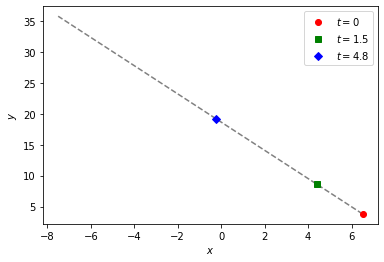

In [15]:
plt.plot(PL(t,u,B)[0] , PL(t,u,B)[1],ls='--',color='gray')

plt.plot(PL(0,u,B)[0] , PL(0,u,B)[1],'o',color='red',label='$t=0$')
plt.plot(PL(1.5,u,B)[0] , PL(1.5,u,B)[1],'s',color='green',label='$t=1.5$')
plt.plot(PL(4.8,u,B)[0] , PL(4.8,u,B)[1],'D',color='blue',label='$t=4.8$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

## _Exercise_ 2

* Plot the line parallel to 
$$
\vec{v} = 6.2\hat{\imath} + 4.5\hat{\jmath}
$$
passing through the base-point $B(-5.6,13.5)$ in parametric form

* Plot the points at time $t=0$, $t=3.2$ and $t=6.7$ along the line


---

# Item 3 - Interactive Plots

* Parametric plots are a goode example of the usefulness of __interactive plots__


* These are plots generated using the __ipywidgets__ library.


## __Example__ 3

* We consider the line parallel to the vector
$$
\vec{w}= 2.3\hat{\imath} + 1.7\hat{\imath} 
$$
and passing through the base-point $B(-1.3,-4.2)$ in parametric form.


* Find the end-point $E(a,b)$ of this parametric line at __t=10__ seconds 


* Plot the line joining $B$ and $E$ on an interactive plot, and use an interactive slider to show a dot moving along this line

## _Solution_ 3

* The first part of this question is very easy, we just use __v2d()__ to define $\vec{w}$ and $B$

In [16]:
B=v2d(-1.3,-4.2)
w=v2d(2.3,1.7)

* The end-point $E$ is now found using __PL()__ at __t=10__ to give

In [17]:
E=PL(10,w,B)
E

array([21.7, 12.8])

* The next part is done by plotting lines and points in the usual way, the difference being they have to be put inside an new __def__ environment we will call __MovingPlot()__


* The preamble of this environment is __@interact(t = (0,10,0.02))__ to indcate we are creating an interactive slider for __t__ which runs from 0 to 10 and increases in steps of 0.02


* In the plot below, use the slider to change the value of __t__, which in turn changes the location of the dot along the line

In [18]:
@interact(t =(0,10,0.02)) # Create an interact environment with the interactive paramter t
def MovingPlot1(t=0): # Define a new environment and initialise the parameter to t=0
    plt.plot([B[0],E[0]] , [B[1],E[1]],ls='--',color='gray') # Plot the line between x-coords B[0] and E[0] and y-coords B[1] and E[1]
    plt.plot(PL(t,w,B)[0],PL(t,w,B)[1],'o',color='red') # Plot a red-dot at time t along the parameterised line

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.02), Output()), _dom_classes=('…

## _Exercise_ 3

* Given line the parallel to the vector
$$
\vec{p}= 5.6\hat{\imath} - 3.3\hat{\imath} 
$$
and passing through the base-point $B(15.5,25.4)$, find the end-point $E(a,b)$ of this parametric line at __t=25__ seconds 



* Plot the line joining $B$ and $E$ on an interactive plot, and use an interactive slider to show a dot moving along this line

---

# Item 4 - Animations

* Another way to create a dynamic plot is to animate the functions in the plot


* The set-up is slightly more complicated than an interactive plot


* In the example below we will create an animation of a dot moving along a given line and tracing out the line as it moves along


* As with interactive plots, the easiest way to create an animation of this simple picture is to used the parametric form of the line

## __Example__ 4

* A moving-point starting at the base-point $B(-4.3,2.1)$ moves with velocity
$$
\vec{v} = 3.3\hat{\imath} +1.2\hat{\jmath}
$$

* Create an animation to show the path traced by the moving-point as it moves along the path


* The parameter should run from __t=0__ to __t=12.5__ seconds

### _Solution_

* We first want to find the end-point of the plot $E(a,b)$ using the __PL()__ function

In [19]:
B=v2d(-4.3,2.1)
v=v2d(3.3,2.1)

E=PL(12.5,v,B)
E

array([36.95, 28.35])

* We set the x-limits of the figure 1 step left of __B__ and one step right of __E__

In [20]:
left = B[0] - 1
right = E[0] + 1

*  We set the y-limits of the figure 1 step below of __B__ and one step above of __E__

In [21]:
bottom = B[1] - 1
top = E[1] + 1

* We now create an __empty figure__ which has place holders for the differnet compnents of the animated plot, i.e. the line and the moving-point


* We can also set the figsize, the x and y limits, and even the line style and dot style and the colors in this empyt plot


* These properties will not change throughout the course of the animation

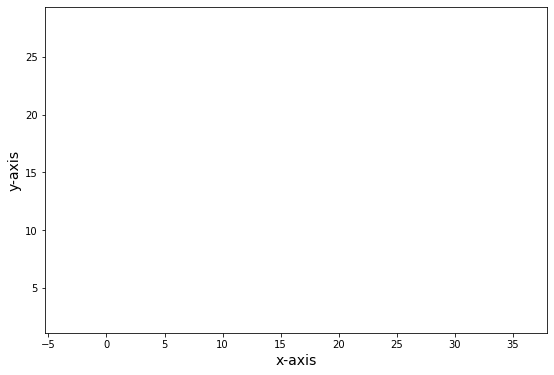

In [22]:
fig = plt.figure(figsize=(9,6)) # Create a figure environment called fig whose size is 9" x 6"

plt.xlim(left,right) # Set the x-limits of fig
plt.ylim(bottom,top) # Set the y-limits of fig

plt.xlabel('x-axis', size=14) # Label the x-axis
plt.ylabel('y-axis', size=14) # Label the y-axis

xdata, ydata = [], [] # Create place-holders for the x and y points along the line

ln, = plt.plot([] , [] , ls='--', color = 'gray') # Create an plot environment called ln, for the line which should be dashed and gray

dot, = plt.plot([] , [], 's' , color = 'red') # Creat a plot environment called dot, for the moving point which should be square and red

* Next we have to create a function we call __update(t)__ which tells the animator what the figure should look like at time __t__

In [23]:
# Everthing inside update(t) will change as the t value changes
def update(t):
    # Set the x,y-data at time t using the PL function
    X=PL(t,v,B)[0]
    Y=PL(t,v,B)[1]
    
    # Append these new data the previous xdata and ydata
    xdata.append(X)
    ydata.append(Y)
    
    # Update the new line including the newly appended data
    ln.set_data(xdata, ydata)

    # Set the x,y-coordinates for the dot at time t
    dot.set_data(X, Y)

    return ln, dot, # Return the updated line and moving-point 

* We create a __np.linspace()__ of values to sub into __update(t)__

In [24]:
T=np.linspace(0,12.5,501) # These are our t values 

* We now create an animation file we call __anim__ using the __animation.FuncAnimation()__ function  

In [25]:
# Start with fig, use update to change it, use T inside update, update=20 sets 20 ms between frame
# blit = True means parts of the plot whci which do not change with time should not be re-plotted in each frame e.g. axis labels 
anim = animation.FuncAnimation(fig, update, frames=T, interval=20, blit=True)

* The animation __anim__ is now ready. Now we just have to display it using  HTML

In [26]:
HTML(anim.to_html5_video())

## _Exercise_ 4

* A moving-point starting at the base-point $B(-15.1,22.1)$ moves with velocity
$$
\vec{v} = 2.3\hat{\imath}  - 4.2\hat{\jmath}
$$

* Create an animation to show the path traced by the moving-point as it moves along the path


* The parameter should run from __t=0__ to __t=18.3__ seconds


* The animation should have a figure-size 10" x 8" and make sure you also use the correct limits for the plot